# Developing the mapping function for Mesoscale Convective Regions

#### The main purpose of this notebook is to develop the tool to track:

- deep convective regions in a km scale simulation, 

- correlation between total cloud cover and severe precipitation. 

#### The plotting function 'map' can do a zooming on 

- pacific_ocean or its tropical area,

- atlantic_ocean or its tropical area,

- indian_ocean or its tropical area.

#### Users can also zoom in by parsing the latitude and longitude bands. 

In [4]:
import sys
from aqua import Reader
from aqua.util import ConfigPath
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

In [15]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 5000, loglevel='warning')

In [ ]:
if ConfigPath().machine=='lumi':
    reader  = Reader(model="IFS", exp="historical-1990-devcon", source="lra-r100-monthly")
    data    = reader.retrieve(var=["tprate"])
else:
    reader  = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
    data    = reader.retrieve(var=["tprate"])

#### The function can be applied to one dataset :

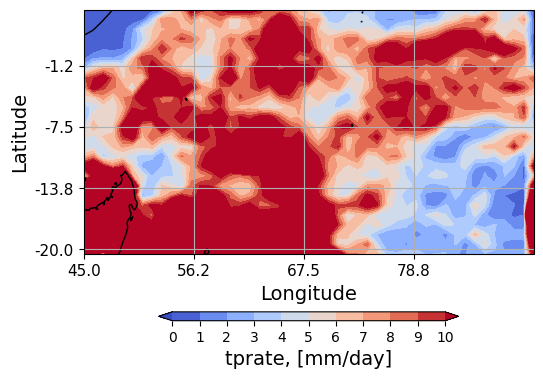

In [16]:
diag.map(data = data,vmin=0, vmax=10,  latmax=5, latmin=-20, lonmax = 90, lonmin=45)

#### Or for a set of datasets or different variables:

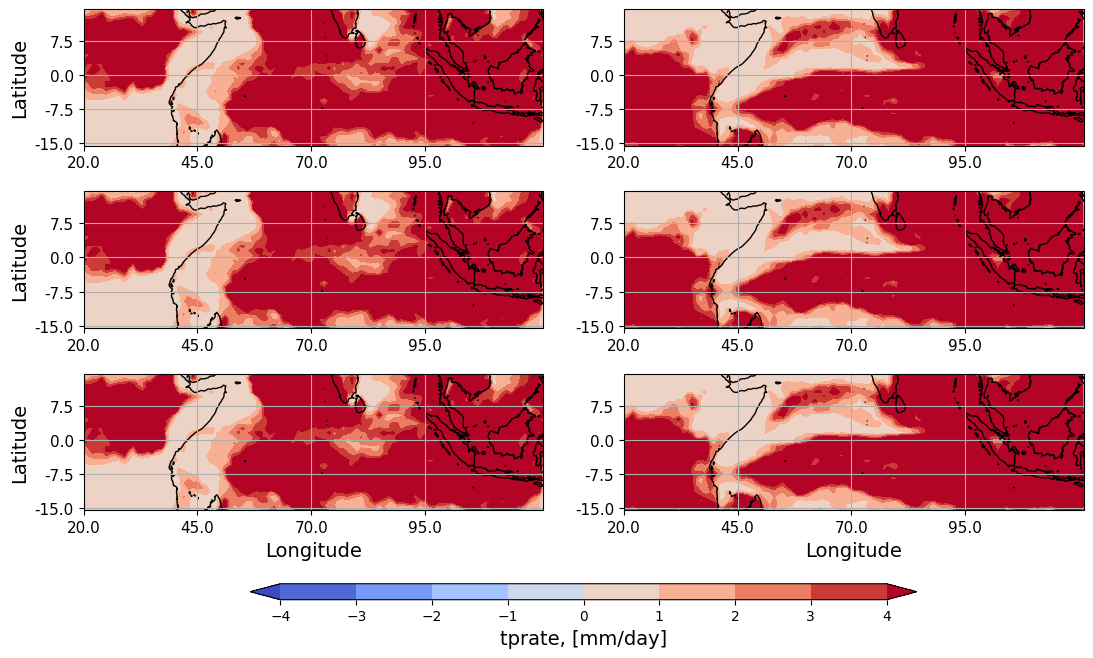

In [17]:
diag.map(data = [data.isel(time=5), data.isel(time=10), data.isel(time=5), data.isel(time=10), data.isel(time=5), data.isel(time=10)], 
         vmin=-4, vmax=4, \
         indian_ocean=True, tropical=True)

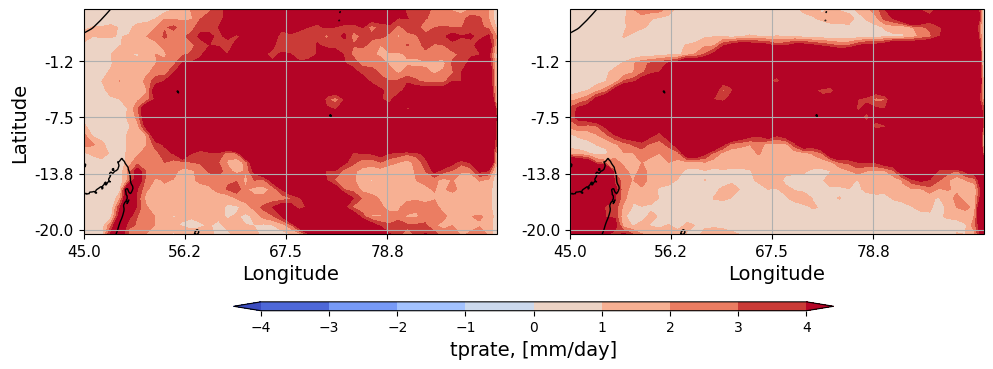

In [19]:
diag.map(data = [data.isel(time=5), data.isel(time=10)], vmin=-4, vmax=4,\
    latmax=5, latmin=-20, lonmax = 90, lonmin=45) 

#### The map for high-resolution data:

In [ ]:
if not lumi:
    reader              = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="2D_1h_native")
    ifs_tco1279_orca025_retrived = reader.retrieve()